In [177]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [178]:
import geopandas as gpd

santiago = gpd.read_file('../Comunas/comunas.shp')

<Axes: >

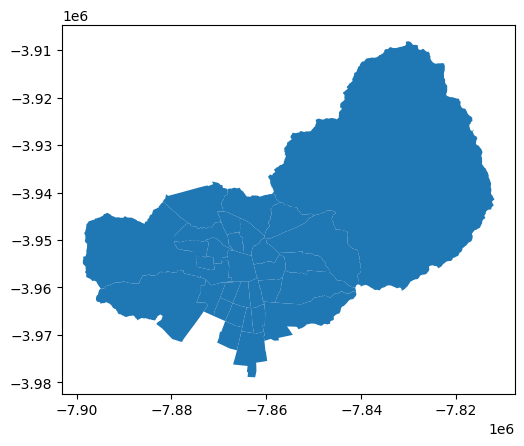

In [179]:
santiago = santiago[santiago['Provincia'] == 'Santiago']
santiago.plot()

In [180]:
santiago.head()

,objectid,shape_leng,dis_elec,cir_sena,cod_comuna,codregion,st_area_sh,st_length_,Region,Comuna,Provincia,geometry
26,330,13987.326781,10,7,13129,13,1.424341e+07,16812.167615,Región Metropolitana de Santiago,San Joaquín,Santiago,"POLYGON ((-7861762.687 -3958307.095, -7861708...."
36,331,13311.641304,13,7,13130,13,1.389538e+07,15988.816037,Región Metropolitana de Santiago,San Miguel,Santiago,"POLYGON ((-7863229.775 -3964360.652, -7863319...."
47,332,11733.486710,13,7,13131,13,9.056280e+06,14061.528858,Región Metropolitana de Santiago,San Ramón,Santiago,"POLYGON ((-7863398.118 -3964354.273, -7863319...."
57,309,11488.695747,9,7,13108,13,1.068637e+07,14088.417488,Región Metropolitana de Santiago,Independencia,Santiago,"POLYGON ((-7865631.125 -3948404.075, -7865643...."
61,310,12797.595762,13,7,13109,13,1.454185e+07,15442.412755,Región Metropolitana de Santiago,La Cisterna,Santiago,"POLYGON ((-7865040.615 -3968217.521, -7865077...."


In [181]:
pobreza_2022 = pd.read_csv('../data/SE-FILTRADA/I-POBREZA-METROPOLITANA-2022.csv')

In [182]:
pobreza_2022.head()

,Código,Región,Nombre comuna,Número de personas según proyecciones de población (*),Número de personas en situación de pobreza por ingresos (**),Porcentaje de personas en situación de pobreza por ingresos 2022,Límite inferior\n (***),Límite superior,Presencia de la comuna en la muestra Casen,Tipo de estimación SAE \n(****),Unnamed: 10
0,13101.0,Metropolitana,Santiago,530.538,20.504,"3,9%","1,8%","5,9%",Sí,Directa y Sintética (Fay-Herriot),NaN
1,13102.0,Metropolitana,Cerrillos,89.907,4.701,"5,2%","2,1%","8,4%",Sí,Directa y Sintética (Fay-Herriot),NaN
2,13103.0,Metropolitana,Cerro Navia,141.122,8.486,"6,0%","2,6%","9,4%",Sí,Directa y Sintética (Fay-Herriot),NaN
3,13104.0,Metropolitana,Conchalí,138.230,8.404,"6,1%","2,8%","9,4%",Sí,Directa y Sintética (Fay-Herriot),NaN
4,13105.0,Metropolitana,El Bosque,170.902,10.593,"6,2%","3,2%","9,2%",Sí,Directa y Sintética (Fay-Herriot),NaN


In [183]:
pobreza_2022.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 11 columns):
 #   Column                                                            Non-Null Count  Dtype  
---  ------                                                            --------------  -----  
 0   Código                                                            52 non-null     float64
 1   Región                                                            52 non-null     object 
 2   Nombre comuna                                                     52 non-null     object 
 3   Número de personas según proyecciones de población (*)            52 non-null     float64
 4   Número de personas en situación de pobreza por ingresos (**)      52 non-null     float64
 5   Porcentaje de personas en situación de pobreza por ingresos 2022  52 non-null     object 
 6   Límite inferior
 (***)                                            52 non-null     object 
 7   Límite superior                      

In [184]:
pobreza_2022['Porcentaje de personas en situación de pobreza por ingresos 2022'] = pobreza_2022['Porcentaje de personas en situación de pobreza por ingresos 2022'].apply(
    lambda x: float((x.replace(',', '.'))[:-1]))


In [185]:
santiago_pobreza = santiago.merge(pobreza_2022, left_on='Comuna', right_on='Nombre comuna', how='left')

In [186]:
santiago_pobreza.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 23 columns):
 #   Column                                                            Non-Null Count  Dtype   
---  ------                                                            --------------  -----   
 0   objectid                                                          32 non-null     int64   
 1   shape_leng                                                        32 non-null     float64 
 2   dis_elec                                                          32 non-null     int32   
 3   cir_sena                                                          32 non-null     int32   
 4   cod_comuna                                                        32 non-null     int32   
 5   codregion                                                         32 non-null     int32   
 6   st_area_sh                                                        32 non-null     float64 
 7   st_length_          

In [187]:
santiago_pobreza = santiago_pobreza.sort_values('Porcentaje de personas en situación de pobreza por ingresos 2022', ascending=False)

/var/folders/ym/46w6_4ls407_ndr7k1j2qkgw0000gn/T/ipykernel_7054/3662912584.py:5: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



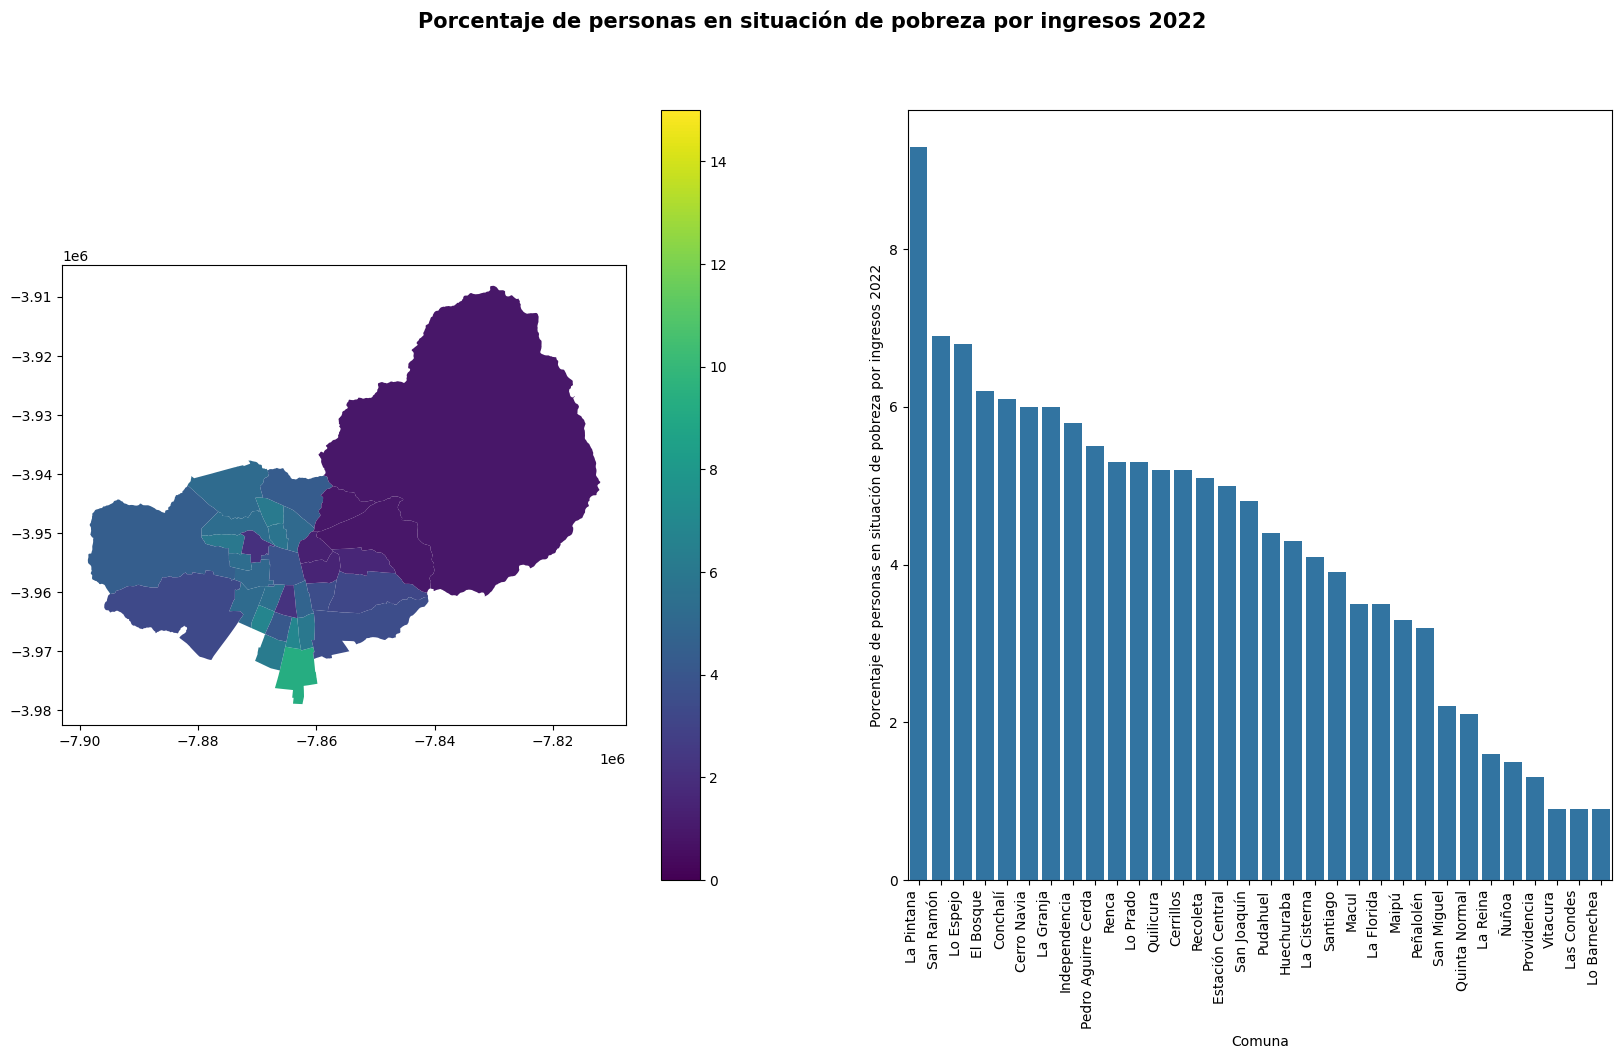

In [188]:
fig, ax = plt.subplots(1, 2, figsize=(20, 10))
sns.barplot(data=santiago_pobreza, x='Comuna', y ='Porcentaje de personas en situación de pobreza por ingresos 2022', ax=ax[1])
santiago_pobreza.plot(column='Porcentaje de personas en situación de pobreza por ingresos 2022', legend=True, cmap='viridis', ax=ax[0], vmin=0, vmax=15)
fig.suptitle('Porcentaje de personas en situación de pobreza por ingresos 2022', fontsize=15, fontweight='bold');
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=90, ha='right');
fig.savefig('../imgs/pobreza_2022.png', bbox_inches = 'tight')

In [189]:
pobreza_2020 = pd.read_csv('../data/SE-FILTRADA/POBREZA-METROPOLITANA-2020.csv')

In [190]:
santiago_po_2020 = santiago.merge(pobreza_2020, left_on='Comuna', right_on='Nombre comuna', how='left')

In [191]:
santiago_po_2020 = santiago_po_2020.sort_values('Porcentaje de personas en situación de pobreza por ingresos 2020', ascending=False)

/var/folders/ym/46w6_4ls407_ndr7k1j2qkgw0000gn/T/ipykernel_7054/920497780.py:5: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



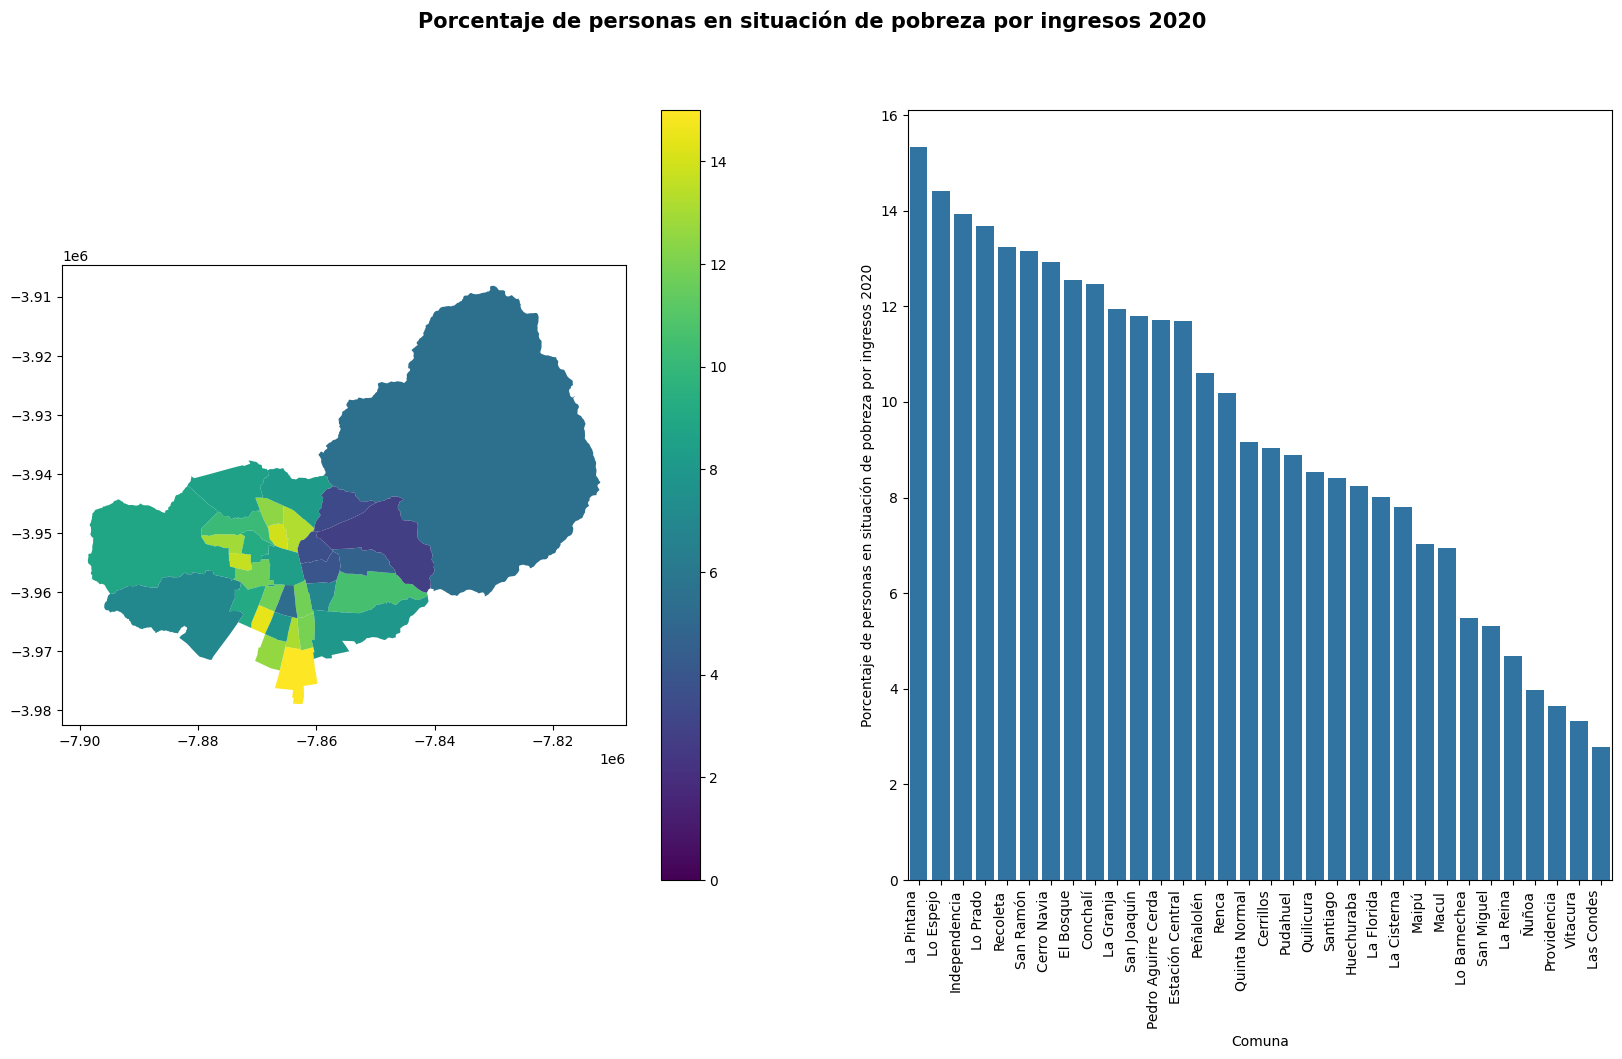

In [192]:
fig, ax = plt.subplots(1, 2, figsize=(20, 10))
sns.barplot(data=santiago_po_2020, x='Comuna', y ='Porcentaje de personas en situación de pobreza por ingresos 2020', ax=ax[1])
santiago_po_2020.plot(column='Porcentaje de personas en situación de pobreza por ingresos 2020', legend=True, cmap='viridis', ax=ax[0], vmin=0, vmax=15)
fig.suptitle('Porcentaje de personas en situación de pobreza por ingresos 2020', fontsize=15, fontweight='bold');
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=90, ha='right');
fig.savefig('../imgs/pobreza_2020.png', bbox_inches = 'tight')

/var/folders/ym/46w6_4ls407_ndr7k1j2qkgw0000gn/T/ipykernel_7054/3600833249.py:7: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

/var/folders/ym/46w6_4ls407_ndr7k1j2qkgw0000gn/T/ipykernel_7054/3600833249.py:8: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



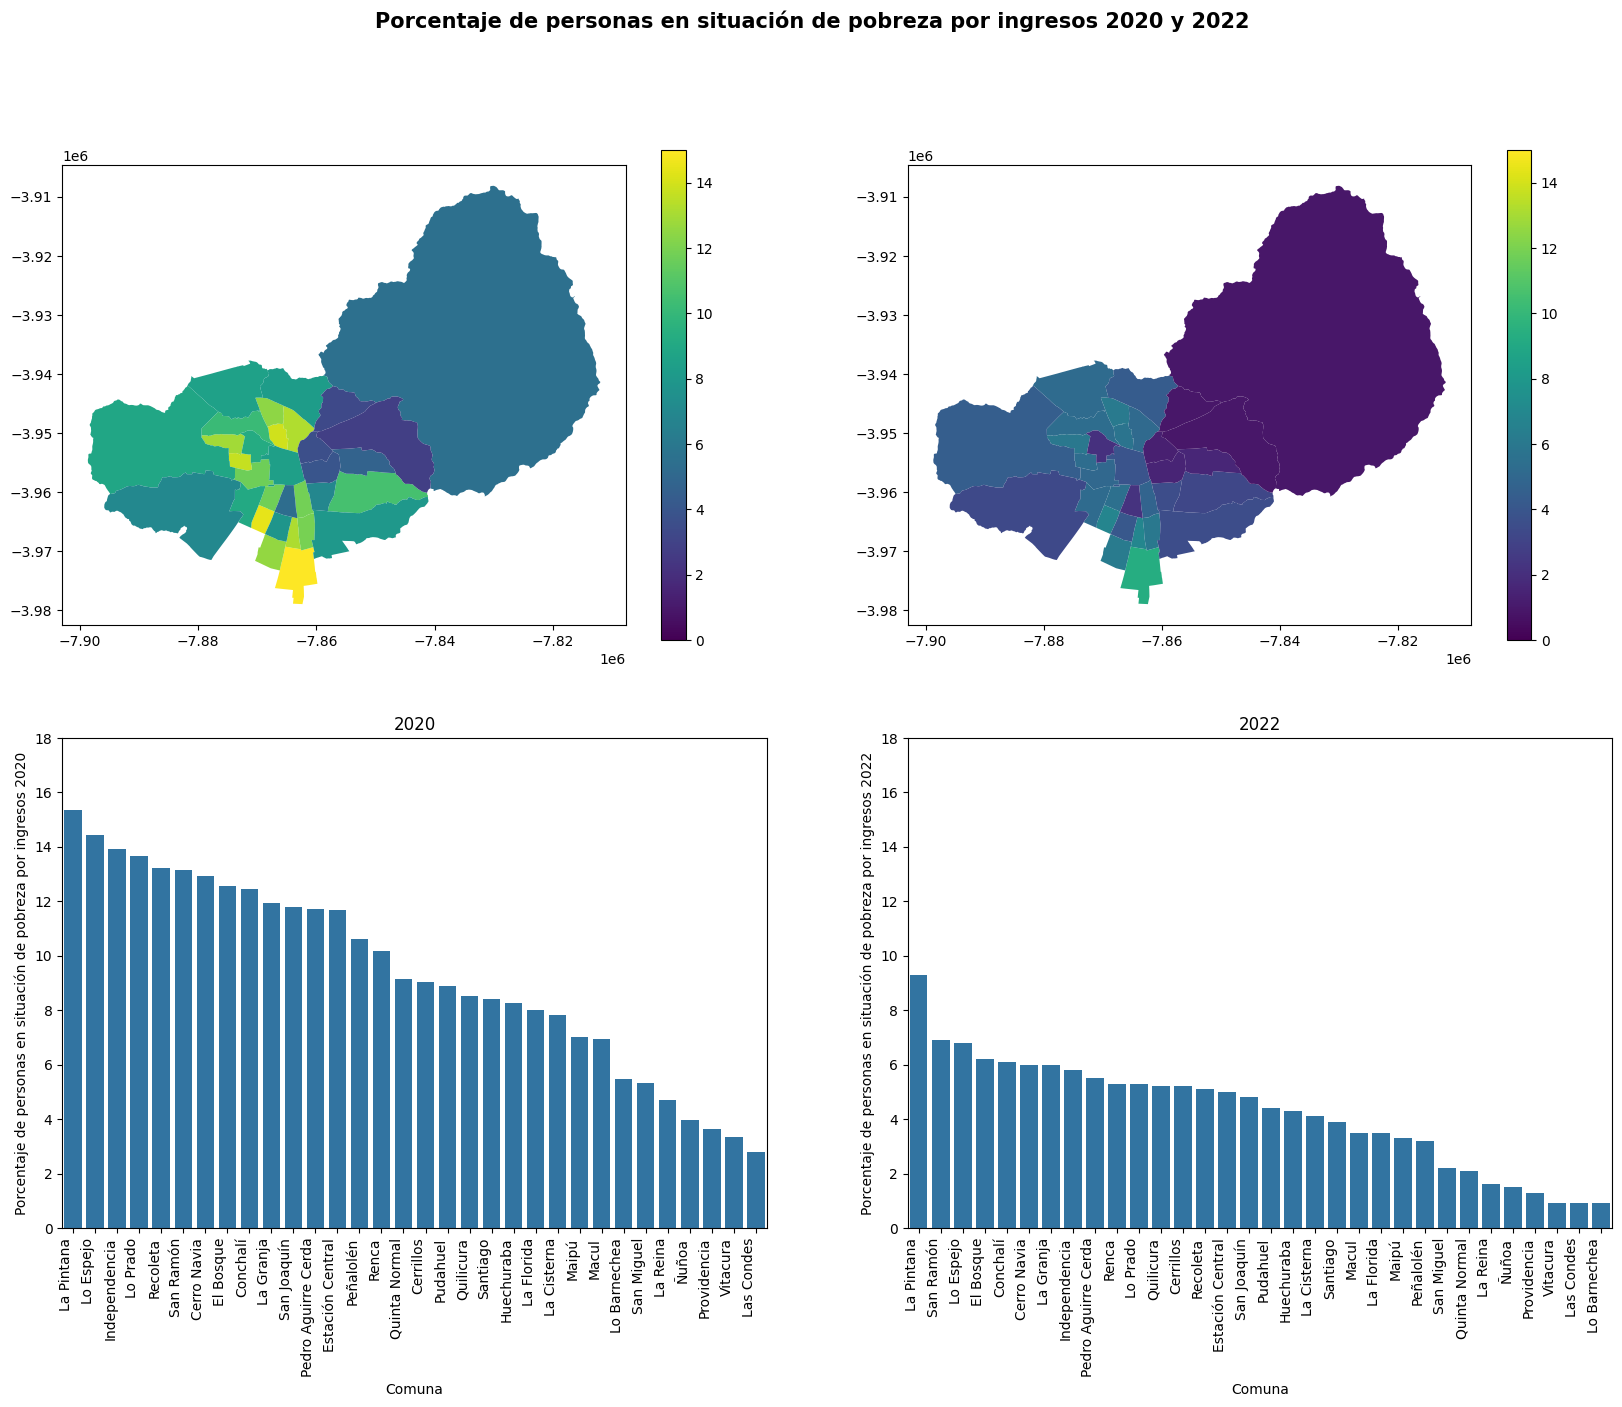

In [193]:
fig, ax = plt.subplots(2,2 , figsize=(20, 14))
sns.barplot(data=santiago_pobreza, x='Comuna', y ='Porcentaje de personas en situación de pobreza por ingresos 2022', ax=ax[1,1])
santiago_pobreza.plot(column='Porcentaje de personas en situación de pobreza por ingresos 2022', legend=True, cmap='viridis', ax=ax[0,1], vmin=0, vmax=15)
sns.barplot(data=santiago_po_2020, x='Comuna', y ='Porcentaje de personas en situación de pobreza por ingresos 2020', ax=ax[1,0])
santiago_po_2020.plot(column='Porcentaje de personas en situación de pobreza por ingresos 2020', legend=True, cmap='viridis', ax=ax[0,0], vmin=0, vmax=15)
fig.suptitle('Porcentaje de personas en situación de pobreza por ingresos 2020 y 2022', fontsize=15, fontweight='bold');
ax[1,0].set_xticklabels(ax[1,0].get_xticklabels(), rotation=90, ha='right');
ax[1,1].set_xticklabels(ax[1,1].get_xticklabels(), rotation=90, ha='right');
ax[1,0].set_title('2020');
ax[1,1].set_title('2022');
ax[1,0].set_yticks(np.arange(0,20,2));
ax[1,1].set_yticks(np.arange(0,20,2));
fig.savefig('../imgs/pobreza_2020_2022.png', bbox_inches = 'tight');

In [231]:
viajes_15_abril = pd.read_csv('../data/viajes.csv', sep= ';', encoding='latin1')

In [232]:
viajes_15_abril.head()


,Comuna,TOTAL
0,LAS CONDES,11.659
1,PROVIDENCIA,25.217
2,PUDAHUEL,10.556
3,SANTIAGO,11.798
4,LA FLORIDA,19.193


In [233]:
viajes_15_abril['TOTAL'] = viajes_15_abril['TOTAL'].apply(lambda x: int(str(x).replace('.', '')))

In [234]:
viajes_15_abril = viajes_15_abril[['Comuna','TOTAL']].groupby('Comuna').sum().reset_index()

In [235]:
viajes_15_abril['Comuna'] = viajes_15_abril['Comuna'].apply(lambda x: x.replace('Ñ', 'N'))

In [236]:
viajes_15_abril.head()

,Comuna,TOTAL
0,CERRILLOS,410829
1,CERRO NAVIA,438730
2,CONCHALI,432542
3,EL BOSQUE,329003
4,ESTACION CENTRAL,726244


In [237]:
santiago['Comuna'] = santiago['Comuna'].apply(lambda x: x.replace('Ñ', 'N'))

#sacar tildes 


In [201]:
!pip install unicodedata

ERROR: Could not find a version that satisfies the requirement unicodedata (from versions: none)

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: /opt/homebrew/opt/python@3.11/bin/python3.11 -m pip install --upgrade pip
ERROR: No matching distribution found for unicodedata


In [202]:

viajes_15_abril = viajes_15_abril[viajes_15_abril['Comuna'].isin(santiago['Comuna'])]



In [238]:
viajes_15_abril.head()

,Comuna,TOTAL
0,CERRILLOS,410829
1,CERRO NAVIA,438730
2,CONCHALI,432542
3,EL BOSQUE,329003
4,ESTACION CENTRAL,726244


import

In [204]:
import unidecode

In [239]:
santiago['Comuna'] = santiago['Comuna'].apply(lambda x: unidecode.unidecode(x))

In [240]:
santiago['Comuna'] = santiago['Comuna'].apply(lambda x: x.upper())

In [241]:
santiago['Comuna']

26             SAN JOAQUIN
36              SAN MIGUEL
47               SAN RAMON
57           INDEPENDENCIA
61             LA CISTERNA
68               PENALOLEN
82             PROVIDENCIA
86                LA REINA
110               SANTIAGO
120             HUECHURABA
129              CERRILLOS
134            CERRO NAVIA
135               VITACURA
136               CONCHALI
137              EL BOSQUE
140       ESTACION CENTRAL
145             LA FLORIDA
146              LA GRANJA
147             LA PINTANA
156             LAS CONDES
157           LO BARNECHEA
158              LO ESPEJO
159               LO PRADO
160                  MACUL
171                  MAIPU
172                  NUNOA
173    PEDRO AGUIRRE CERDA
184               PUDAHUEL
185              QUILICURA
189          QUINTA NORMAL
190               RECOLETA
202                  RENCA
Name: Comuna, dtype: object

In [242]:
viajes_15_abril_m = santiago.merge(viajes_15_abril, left_on='Comuna', right_on='Comuna', how='left')

In [243]:
viajes_15_abril_m = viajes_15_abril_m.sort_values('TOTAL', ascending=False)


In [244]:
viajes_15_abril_m.head()

,objectid,shape_leng,dis_elec,cir_sena,cod_comuna,codregion,st_area_sh,st_length_,Region,Comuna,Provincia,geometry,TOTAL
8,333,24644.018619,10,7,13101,13,3.337678e+07,29171.609500,Región Metropolitana de Santiago,SANTIAGO,Santiago,"POLYGON ((-7864917.074 -3952801.626, -7864220....",2752604
24,320,61424.982526,8,7,13119,13,1.990876e+08,73734.913427,Región Metropolitana de Santiago,MAIPU,Santiago,"POLYGON ((-7877529.505 -3956422.697, -7877529....",2086767
19,315,51230.563241,11,7,13114,13,1.416658e+08,61618.090148,Región Metropolitana de Santiago,LAS CONDES,Santiago,"POLYGON ((-7851625.483 -3946140.988, -7851625....",1575747
6,324,16072.408276,10,7,13123,13,2.073083e+07,19223.740933,Región Metropolitana de Santiago,PROVIDENCIA,Santiago,"POLYGON ((-7857468.292 -3952687.257, -7857424....",1372063
25,321,17714.126051,10,7,13120,13,2.436772e+07,21422.185446,Región Metropolitana de Santiago,NUNOA,Santiago,"POLYGON ((-7856574.414 -3957887.494, -7856608....",1329203


/var/folders/ym/46w6_4ls407_ndr7k1j2qkgw0000gn/T/ipykernel_7054/456832831.py:5: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



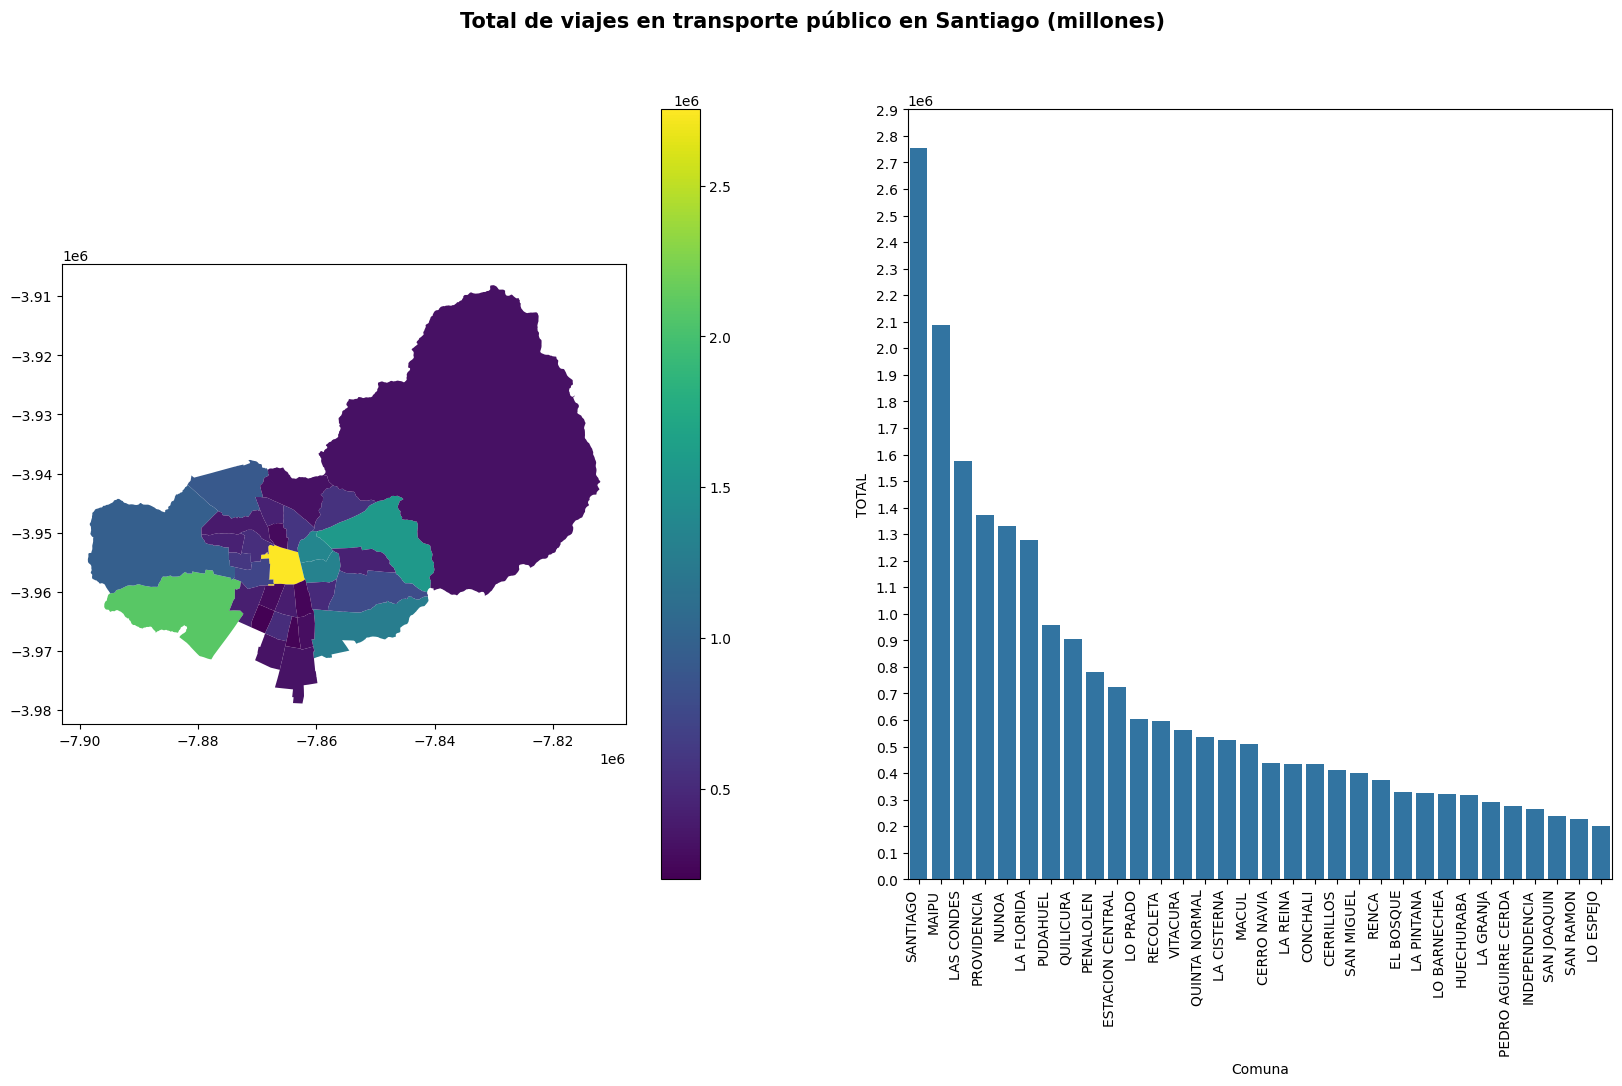

In [245]:
fig, ax = plt.subplots(1, 2, figsize=(20, 10))
sns.barplot(data=viajes_15_abril_m, x='Comuna', y ='TOTAL', ax=ax[1])
viajes_15_abril_m.plot(column='TOTAL', legend=True, cmap='viridis', ax=ax[0])
fig.suptitle('Total de viajes en transporte público en Santiago (millones)', fontsize=15, fontweight='bold');
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=90, ha='right');
ax[1].set_yticks(np.arange(0, 3000000, 100000))
fig.savefig('../imgs/viajes_15_abril.png', bbox_inches='tight')


In [246]:
viajes_15_abril_m.head()

,objectid,shape_leng,dis_elec,cir_sena,cod_comuna,codregion,st_area_sh,st_length_,Region,Comuna,Provincia,geometry,TOTAL
8,333,24644.018619,10,7,13101,13,3.337678e+07,29171.609500,Región Metropolitana de Santiago,SANTIAGO,Santiago,"POLYGON ((-7864917.074 -3952801.626, -7864220....",2752604
24,320,61424.982526,8,7,13119,13,1.990876e+08,73734.913427,Región Metropolitana de Santiago,MAIPU,Santiago,"POLYGON ((-7877529.505 -3956422.697, -7877529....",2086767
19,315,51230.563241,11,7,13114,13,1.416658e+08,61618.090148,Región Metropolitana de Santiago,LAS CONDES,Santiago,"POLYGON ((-7851625.483 -3946140.988, -7851625....",1575747
6,324,16072.408276,10,7,13123,13,2.073083e+07,19223.740933,Región Metropolitana de Santiago,PROVIDENCIA,Santiago,"POLYGON ((-7857468.292 -3952687.257, -7857424....",1372063
25,321,17714.126051,10,7,13120,13,2.436772e+07,21422.185446,Región Metropolitana de Santiago,NUNOA,Santiago,"POLYGON ((-7856574.414 -3957887.494, -7856608....",1329203


In [247]:
millones_pjeros = pd.read_csv('../data/millones_de_pasajeros.csv', sep=';')

In [248]:
millones_pjeros.head(30)

,Unnamed: 0,Año,Línea1,Línea 2,Línea 3,Línea 4,Línea 4A,Línea 5,Línea 6,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15
0,NaN,1990,"115,37","39,67",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,1991,"113,06","42,46",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,1992,"117,24","43,33",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,1993,"124,57","39,63",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,1994,"127,57","39,48",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,1995,"126,53","39,99",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,1996,"136,79","41,76",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,1997,"141,09","39,93",NaN,NaN,NaN,"18,71",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,1998,"136,14","37,10",NaN,NaN,NaN,"21,14",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,1999,"129,40","33,33",NaN,NaN,NaN,"22,03",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [249]:
millones_pjeros = millones_pjeros[['Año', 'Línea1','Línea 2','Línea 3','Línea 4','Línea 4A','Línea 5','Línea 6']]
millones_pjeros.head()

,Año,Línea1,Línea 2,Línea 3,Línea 4,Línea 4A,Línea 5,Línea 6
0,1990,"115,37","39,67",NaN,NaN,NaN,NaN,NaN
1,1991,"113,06","42,46",NaN,NaN,NaN,NaN,NaN
2,1992,"117,24","43,33",NaN,NaN,NaN,NaN,NaN
3,1993,"124,57","39,63",NaN,NaN,NaN,NaN,NaN
4,1994,"127,57","39,48",NaN,NaN,NaN,NaN,NaN


In [250]:
millones_pjeros = millones_pjeros.fillna(0)

In [251]:
millones_pjeros.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Año       34 non-null     int64 
 1   Línea1    34 non-null     object
 2   Línea 2   34 non-null     object
 3   Línea 3   34 non-null     object
 4   Línea 4   34 non-null     object
 5   Línea 4A  34 non-null     object
 6   Línea 5   34 non-null     object
 7   Línea 6   34 non-null     object
dtypes: int64(1), object(7)
memory usage: 2.3+ KB


In [252]:
def transformacion_millones(x):
    x = str(x)
    x = x.replace(',', '')
    x += '0000'
    return int(x)
for col in millones_pjeros.columns[1:]:
    millones_pjeros[col] = millones_pjeros[col].apply(transformacion_millones)


In [253]:
millones_pjeros.head()

,Año,Línea1,Línea 2,Línea 3,Línea 4,Línea 4A,Línea 5,Línea 6
0,1990,115370000,39670000,0,0,0,0,0
1,1991,113060000,42460000,0,0,0,0,0
2,1992,117240000,43330000,0,0,0,0,0
3,1993,124570000,39630000,0,0,0,0,0
4,1994,127570000,39480000,0,0,0,0,0


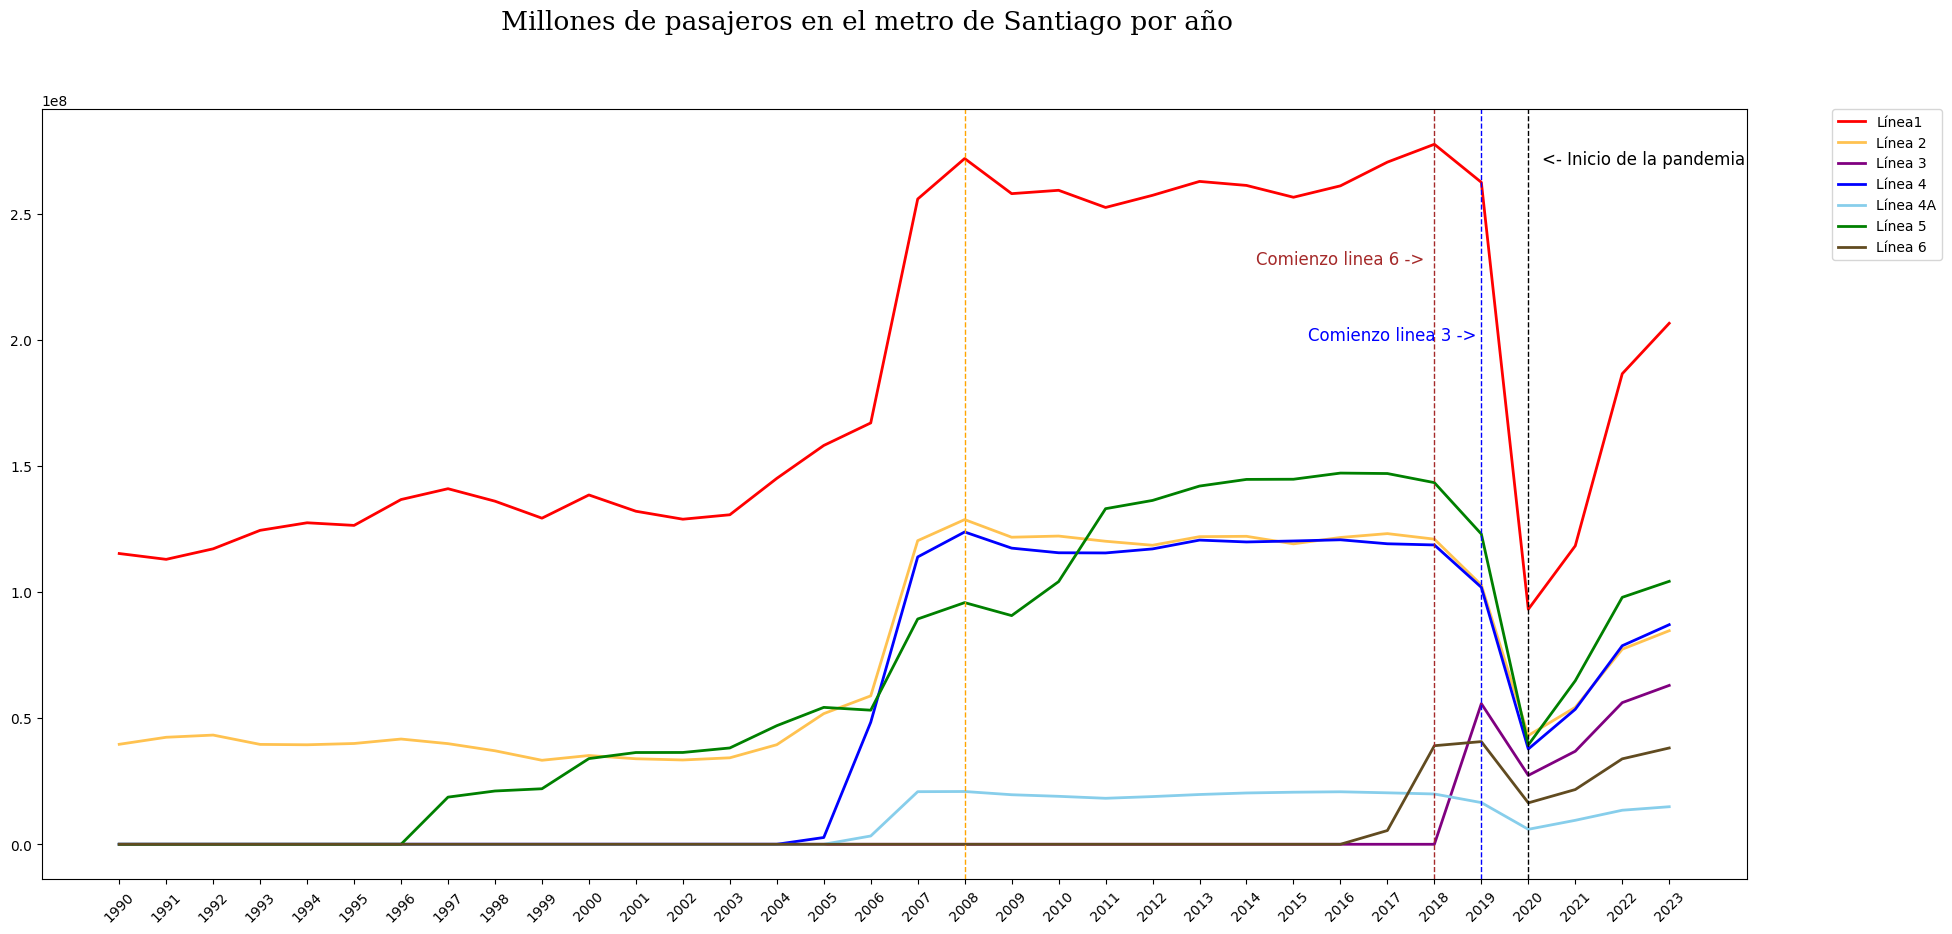

In [254]:
fig, ax = plt.subplots(1, figsize=(22, 10))

colores = ['red','#ffc250','purple','blue','skyblue','green','#614b20']
i = 0
for col in millones_pjeros.columns[1:]:
    ax.plot(millones_pjeros['Año'], millones_pjeros[col], label=col, color=colores[i], linewidth=2) 
    i += 1

#vertical line
ax.axvline(x=2020, color='black', linestyle='--', linewidth=1)
ax.text(2020.3, 270000000, '<- Inicio de la pandemia', fontsize=12)
ax.axvline(x=2008, color='orange', linestyle='--', linewidth=1)
ax.axvline(x=2019, color='blue', linestyle='--', linewidth=1)
ax.text(2015.3, 200000000, 'Comienzo linea 3 ->', fontsize=12, color='blue')
ax.axvline(x=2018, color='brown', linestyle='--', linewidth=1)
ax.text(2014.2, 230000000, 'Comienzo linea 6 ->', fontsize=12, color='brown')
ax.set_xticks(millones_pjeros['Año'])
ax.set_xticklabels(millones_pjeros['Año'], rotation=45)
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
fig.suptitle('Millones de pasajeros en el metro de Santiago por año', fontsize=19, fontfamily='serif');
fig.savefig('../imgs/millones_pasajeros_metro.png', bbox_inches = 'tight')

In [255]:
rutas_metro = pd.read_json('../Metro_geo/Rutas Metro.geojson',)

In [256]:
rutas_metro

,type,generator,copyright,timestamp,features
0,FeatureCollection,overpass-turbo,The data included in this document is from www...,2024-11-10 14:30:00+00:00,"{'type': 'Feature', 'properties': {'@id': 'rel..."
1,FeatureCollection,overpass-turbo,The data included in this document is from www...,2024-11-10 14:30:00+00:00,"{'type': 'Feature', 'properties': {'@id': 'rel..."
2,FeatureCollection,overpass-turbo,The data included in this document is from www...,2024-11-10 14:30:00+00:00,"{'type': 'Feature', 'properties': {'@id': 'rel..."
3,FeatureCollection,overpass-turbo,The data included in this document is from www...,2024-11-10 14:30:00+00:00,"{'type': 'Feature', 'properties': {'@id': 'rel..."
4,FeatureCollection,overpass-turbo,The data included in this document is from www...,2024-11-10 14:30:00+00:00,"{'type': 'Feature', 'properties': {'@id': 'rel..."
...,...,...,...,...,...
422,FeatureCollection,overpass-turbo,The data included in this document is from www...,2024-11-10 14:30:00+00:00,"{'type': 'Feature', 'properties': {'@id': 'nod..."
423,FeatureCollection,overpass-turbo,The data included in this document is from www...,2024-11-10 14:30:00+00:00,"{'type': 'Feature', 'properties': {'@id': 'nod..."
424,FeatureCollection,overpass-turbo,The data included in this document is from www...,2024-11-10 14:30:00+00:00,"{'type': 'Feature', 'properties': {'@id': 'nod..."
425,FeatureCollection,overpass-turbo,The data included in this document is from www...,2024-11-10 14:30:00+00:00,"{'type': 'Feature', 'properties': {'@id': 'nod..."


In [257]:
rutas_metro_n = pd.json_normalize(rutas_metro['features'])
rutas_metro_n

,type,id,properties.@id,properties.colour,properties.from,properties.image,properties.name,properties.network,properties.network:wikidata,properties.network:wikipedia,...,properties.wheelchair,properties.wikimedia_commons,properties.roundtrip,properties.description,properties.proposed:route,properties.source,properties.construction:route,properties.network:type,properties.note,properties.@relations
0,Feature,relation/444961,relation/444961,#292d91,Tobalaba,https://upload.wikimedia.org/wikipedia/commons...,Línea 4: Tobalaba → Plaza de Puente Alto,Metro de Santiago,Q913314,es:Metro de Santiago,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Feature,relation/444963,relation/444963,#cc0000,Los Domínicos,https://upload.wikimedia.org/wikipedia/commons...,Línea 1: Los Dominicos → San Pablo,Metro de Santiago,Q913314,es:Metro de Santiago,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Feature,relation/444964,relation/444964,#006633,Plaza de Maipú,https://upload.wikimedia.org/wikipedia/commons...,Línea 5: Plaza de Maipú → Vicente Valdés,Metro de Santiago,Q913314,es:Metro de Santiago,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Feature,relation/444976,relation/444976,#8e16a1,Cerrillos,https://upload.wikimedia.org/wikipedia/commons...,Línea 6: Cerrillos → Los Leones,Metro de Santiago,Q913314,es:Metro de Santiago,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Feature,relation/444982,relation/444982,#0099ff,Vicuña Mackenna,https://upload.wikimedia.org/wikipedia/commons...,Línea 4A: Vicuña Mackenna → La Cisterna,Metro de Santiago,Q913314,es:Metro de Santiago,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
422,Feature,node/12047010160,node/12047010160,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[{'role': 'inactive', 'rel': 17824814, 'reltag..."
423,Feature,node/10288134274,node/10288134274,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[{'role': 'inactive', 'rel': 15789478, 'reltag..."
424,Feature,node/12047010179,node/12047010179,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[{'role': 'inactive', 'rel': 17824814, 'reltag..."
425,Feature,node/11207850519,node/11207850519,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[{'role': 'inactive', 'rel': 16358740, 'reltag..."


In [258]:
rutas_metro_n.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 427 entries, 0 to 426
Data columns (total 37 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   type                                 427 non-null    object
 1   id                                   427 non-null    object
 2   properties.@id                       427 non-null    object
 3   properties.colour                    33 non-null     object
 4   properties.from                      32 non-null     object
 5   properties.image                     25 non-null     object
 6   properties.name                      33 non-null     object
 7   properties.network                   32 non-null     object
 8   properties.network:wikidata          32 non-null     object
 9   properties.network:wikipedia         30 non-null     object
 10  properties.operator                  32 non-null     object
 11  properties.operator:wikidata         32 non-n

In [259]:
rutas_metro_n[['geometry.coordinates']].to_csv('../Metro_geo/rutas_metro.csv', index=False)

In [260]:
coordinadas = pd.read_csv('../Metro_geo/rutas_metro.csv')
coordinadas


,geometry.coordinates
0,"[[-70.6008592, -33.4187508], [-70.5996327, -33..."
1,"[[-70.5449952, -33.4078709], [-70.5523203, -33..."
2,"[[-70.7572897, -33.5105325], [-70.7572906, -33..."
3,"[[-70.6080912, -33.4207846], [-70.6095326, -33..."
4,"[[-70.5958103, -33.5192008], [-70.5962255, -33..."
...,...
422,"[-70.5478676, -33.3894587]"
423,"[-70.5330733, -33.382821]"
424,"[-70.5330442, -33.382841]"
425,"[-70.517592, -33.3726613]"


In [261]:
import ast


coordinadas['geometry.coordinates'] = coordinadas['geometry.coordinates'].apply(ast.literal_eval)

# Check the first few entries after parsing to confirm structure
coordinadas['geometry.coordinates'].head()


0    [[-70.6008592, -33.4187508], [-70.5996327, -33...
1    [[-70.5449952, -33.4078709], [-70.5523203, -33...
2    [[-70.7572897, -33.5105325], [-70.7572906, -33...
3    [[-70.6080912, -33.4207846], [-70.6095326, -33...
4    [[-70.5958103, -33.5192008], [-70.5962255, -33...
Name: geometry.coordinates, dtype: object

In [262]:
def checker(x):
    for _ in x:
        if isinstance(_, float):
            return [x]
    return x
coordinadas['geometry.coordinates'] = coordinadas['geometry.coordinates'].apply(checker)

In [263]:
coordinadas

,geometry.coordinates
0,"[[-70.6008592, -33.4187508], [-70.5996327, -33..."
1,"[[-70.5449952, -33.4078709], [-70.5523203, -33..."
2,"[[-70.7572897, -33.5105325], [-70.7572906, -33..."
3,"[[-70.6080912, -33.4207846], [-70.6095326, -33..."
4,"[[-70.5958103, -33.5192008], [-70.5962255, -33..."
...,...
422,"[[-70.5478676, -33.3894587]]"
423,"[[-70.5330733, -33.382821]]"
424,"[[-70.5330442, -33.382841]]"
425,"[[-70.517592, -33.3726613]]"


ValueError: too many values to unpack (expected 2)

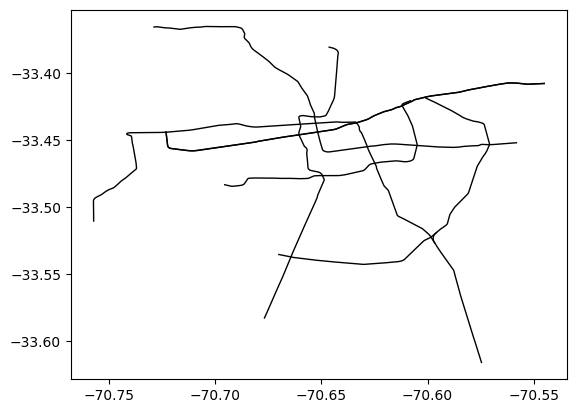

In [264]:

for i in range(len(coordinadas)):
    coords = coordinadas['geometry.coordinates'][i]
    if len(coords) == 1:
        long, lat = coords[0]
    else:
        long, lat = zip(*coords)

    plt.plot(long, lat, color='black', linewidth=1)

In [ ]:
rutas = gpd.read_file('../Metro_geo/metror.geojson')

In [ ]:
rutas['id'] = rutas['id'].apply(lambda x: int(x))

In [ ]:
rutas.head()

,FID,objectid,id,especial,estacion,nombre,temporal,f1,tipo,linea,geometry
0,1,1,1,EXISTENTE INTERMODAL,EXISTENTE,SAN PABLO,INTERMODAL,1,ESTACION METRO,Linea 1,POINT (-70.72329 -33.44419)
1,2,2,2,EXISTENTE,EXISTENTE,NEPTUNO,,1,ESTACION METRO,Linea 1,POINT (-70.72254 -33.45193)
2,3,3,3,EXISTENTE INTERMODAL,EXISTENTE,PAJARITOS,INTERMODAL,1,ESTACION METRO,Linea 1,POINT (-70.7134 -33.45783)
3,4,4,4,EXISTENTE,EXISTENTE,LAS REJAS,,1,ESTACION METRO,Linea 1,POINT (-70.70647 -33.45724)
4,5,5,5,CONSTRUCCION INTERMODAL,CONSTRUCCION,QUINTA NORMAL,INTERMODAL,1,ESTACION METRO,Linea 5,POINT (-70.68007 -33.44034)


In [ ]:
linea1 = rutas[rutas['linea'] == 'Linea 1']
linea2 = rutas[rutas['linea'] == 'Linea 2']
linea3 = rutas[rutas['linea'] == 'Linea 3']
linea4 = rutas[rutas['linea'] == 'Linea 4']
linea4a = rutas[rutas['linea'] == 'Linea 4A']
linea5 = rutas[rutas['linea'] == 'Linea 5']
linea6 = rutas[rutas['linea'] == 'Linea 6']


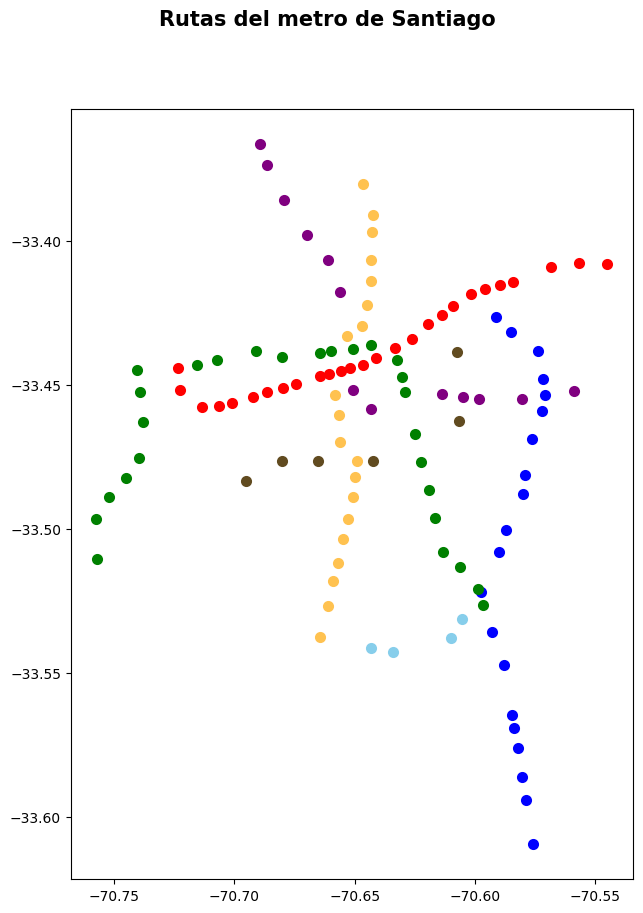

In [ ]:
lineas = [linea1, linea2, linea3, linea4, linea4a, linea5, linea6]

fig, ax = plt.subplots(1, figsize=(20, 10))
i = 0
for linea in lineas:
    # plot each line, and link the dots with a line
    x = linea['geometry'].apply(lambda x: x.xy[0]).values
    y = linea['geometry'].apply(lambda x: x.xy[1]).values       
    linea.plot(ax=ax, color=colores[i], linewidth=2)

    i += 1


fig.suptitle('Rutas del metro de Santiago', fontsize=15, fontweight='bold');

In [ ]:
rutas['latitud'] = rutas['geometry'].apply(lambda x: x.y)
rutas['longitud'] = rutas['geometry'].apply(lambda x: x.x)

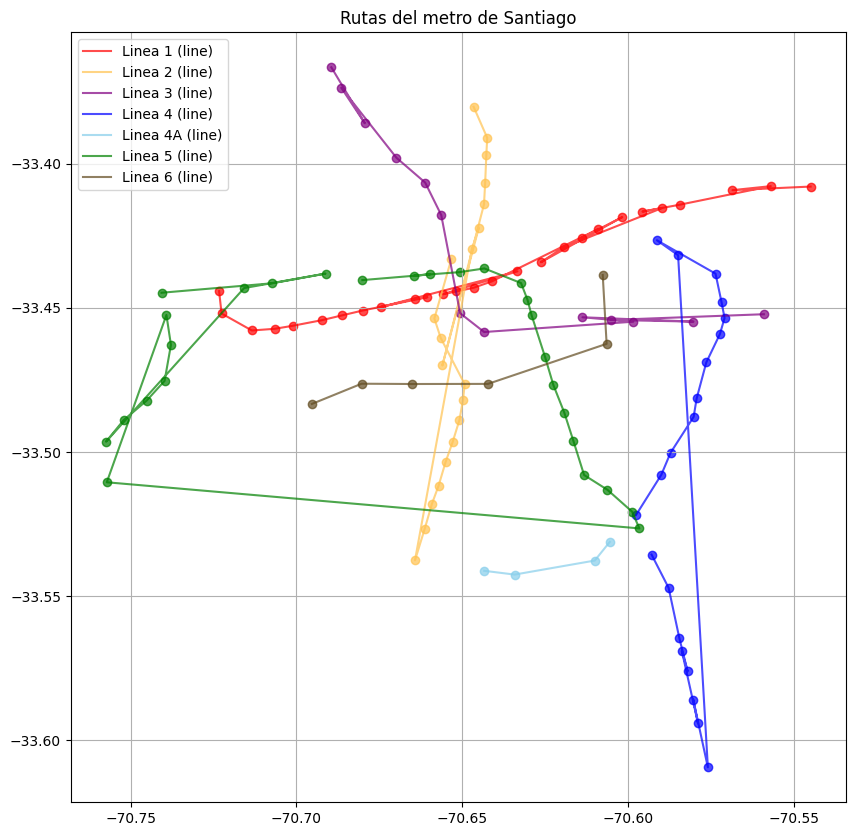

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Assuming `rutas` is your GeoDataFrame

# Create a figure
fig, ax = plt.subplots(figsize=(10, 10))

# Group by subway lines and plot each line with points and connecting lines
i = 0
for line, group in rutas.groupby('linea'):
    # Extract the coordinates from the geometry

    group = group.sort_values('id')
    x_coords = group.geometry.x
    y_coords = group.geometry.y
    
    # Plot points
    ax.scatter(x_coords, y_coords, color = colores[i], alpha=0.7)
    # Plot connecting lines
    ax.plot(x_coords, y_coords, linestyle='-', label=f'{line} (line)', alpha=0.7, color = colores[i])
    i += 1

# Add legend, title, and grid
ax.legend()
ax.set_title("Rutas del metro de Santiago")
ax.grid(True)
plt.show()


In [ ]:
estaciones_simple = pd.read_json('../Metro_geo/estaciones_simple.json')

/var/folders/ym/46w6_4ls407_ndr7k1j2qkgw0000gn/T/ipykernel_7054/1790771302.py:1: FutureWarning: The behavior of 'to_datetime' with 'unit' when parsing strings is deprecated. In a future version, strings will be parsed as datetime strings, matching the behavior without a 'unit'. To retain the old behavior, explicitly cast ints or floats to numeric type before calling to_datetime.
  estaciones_simple = pd.read_json('../Metro_geo/estaciones_simple.json')
/var/folders/ym/46w6_4ls407_ndr7k1j2qkgw0000gn/T/ipykernel_7054/1790771302.py:1: FutureWarning: The behavior of 'to_datetime' with 'unit' when parsing strings is deprecated. In a future version, strings will be parsed as datetime strings, matching the behavior without a 'unit'. To retain the old behavior, explicitly cast ints or floats to numeric type before calling to_datetime.
  estaciones_simple = pd.read_json('../Metro_geo/estaciones_simple.json')
/var/folders/ym/46w6_4ls407_ndr7k1j2qkgw0000gn/T/ipykernel_7054/1790771302.py:1: FutureW

In [ ]:
estaciones_simple.T

,color,estaciones,combinaciones
1,red,"[San Pablo, Neptuno, Pajaritos, Las Rejas, Ecu...","[San Pablo, Los Héroes, Universidad de Chile, ..."
2,yellow,"[Hospital El Pino, Copa Lo Martínez, Observato...","[Puente Cal y Canto, Santa Ana, Los Héroes, Fr..."
3,brown,"[Plaza Quilicura, Lo Cruzat, Ferrocarril, Los ...","[Puente Cal y Canto, Plaza de Armas, Universid..."
4,blue,"[Tobalaba, Cristobal Colón, Francisco Bilbao, ...","[Tobalaba, Plaza Egaña, Vicuña Mackenna, Vicen..."
4A,skyblue,"[Vicuña Mackenna, Santa Julia, La Granja, Sant...","[La Cistarna, Vicuña Mackenna]"
5,green,"[Plaza Maipú, Santiago Bueras, Del Sol, Monte ...","[San Pablo, Santa Ana, Plaza de Armas, Baqueda..."
6,purple,"[Cerrillos, Lo Valledor, Presidente Pedro Agui...","[Franklin, Ñuble, Ñuñoa, Los Leones]"


In [ ]:
info_estaciones = pd.DataFrame()

In [ ]:
for linea in lineas:
    estaciones  =linea[['nombre', 'linea', 'latitud', 'longitud']]
    info_estaciones = pd.concat([info_estaciones, estaciones])

info_estaciones = info_estaciones.reset_index(drop=True)


KeyError: "['latitud', 'longitud'] not in index"

In [ ]:
info_estaciones

""


In [ ]:
info_estaciones.to_csv('../Metro_geo/info_estaciones.csv', index=False)

In [ ]:
estaciones_s = pd.DataFrame()

In [ ]:
estaciones_simple

,1,2,3,4,4A,5,6
color,red,yellow,brown,blue,skyblue,green,purple
estaciones,"[San Pablo, Neptuno, Pajaritos, Las Rejas, Ecu...","[Hospital El Pino, Copa Lo Martínez, Observato...","[Plaza Quilicura, Lo Cruzat, Ferrocarril, Los ...","[Tobalaba, Cristobal Colón, Francisco Bilbao, ...","[Vicuña Mackenna, Santa Julia, La Granja, Sant...","[Plaza Maipú, Santiago Bueras, Del Sol, Monte ...","[Cerrillos, Lo Valledor, Presidente Pedro Agui..."
combinaciones,"[San Pablo, Los Héroes, Universidad de Chile, ...","[Puente Cal y Canto, Santa Ana, Los Héroes, Fr...","[Puente Cal y Canto, Plaza de Armas, Universid...","[Tobalaba, Plaza Egaña, Vicuña Mackenna, Vicen...","[La Cistarna, Vicuña Mackenna]","[San Pablo, Santa Ana, Plaza de Armas, Baqueda...","[Franklin, Ñuble, Ñuñoa, Los Leones]"


In [ ]:
esta = []
for col in estaciones_simple.columns:
    print(estaciones_simple.loc['estaciones', col])
    esta += estaciones_simple.loc['estaciones', col]

estaciones_s['estaciones'] = esta

['San Pablo', 'Neptuno', 'Pajaritos', 'Las Rejas', 'Ecuador', 'San Alberto Hurtado', 'Universidad de Santiago', 'Estación Central', 'Unión Latinoamericana', 'República', 'Los Héroes', 'La Moneda', 'Universidad de Chile', 'Santa Lucía', 'Universidad Católica', 'Baquedano', 'Salvador', 'Manuel Montt', 'Pedro de Valdivia', 'Los Leones', 'Tobalaba', 'El Golf', 'Alcántara', 'Escuela Militar', 'Manquehue', 'Hernando de Magallanes', 'Los Dominicos']
['Hospital El Pino', 'Copa Lo Martínez', 'Observatorio', 'El Bosque', 'La Cisterna', 'El Parrón', 'Lo Ovalle', 'Ciudad del Niño', 'Departamental', 'Lo Vial', 'San Miguel', 'El Llano', 'Franklin', 'Rondizzoni', "Parque O'Higgins", 'Toesca', 'Los Héroes', 'Santa Ana', 'Cal y Canto', 'Patronato', 'Cerro Blanco', 'Cementerios', 'Einstein', 'Dorsal', 'Zapadores', 'Vespucio Norte']
['Plaza Quilicura', 'Lo Cruzat', 'Ferrocarril', 'Los Libertadores', 'Cardenal Caro', 'Vivaceta', 'Conchalí', 'Plaza Chacabuco', 'Hospitales', 'Puente Cal y Canto', 'Plaza de 

In [ ]:
estaciones_s = estaciones_s.explode('estaciones')

In [ ]:
estaciones_s['estaciones'] = estaciones_s['estaciones'].apply(lambda x: x.upper())
estaciones_s['ID'] = estaciones_s.index

In [ ]:
estaciones_s.to_csv('../Metro_geo/estaciones_s.csv', index=False)

In [ ]:
merge = info_estaciones.merge(estaciones_s, left_on='nombre', right_on='estaciones', how='right')

merge.to_csv('../Metro_geo/estaciones_info.csv', index=False)

In [ ]:
shape = gpd.read_file('../rutas micro shp/Shape 09Nov2024_v2.shp')

In [ ]:
shape.head(10)

,ROUTE_ID,ROUTE_NAME,SERVICE_NA,UN,OP_NOC,DIST,DISTPAGO,PO_MOD,SENTIDO,COD_USUARI,...,TIPO_SERV,FREC_PM,FREC_PT,PLAZAS_PM,PLAZAS_PT,SEL_PM,SEL_PT,SEN1,VALIDA,geometry
0,1360,410yI,INYECCION,8,None,10.913430,0.0,Sin Modificacion,I,410,...,3,0.0,0.0,0.0,0.0,0.0,0.0,1,1,"LINESTRING (341421.947 6302537.306, 341494.052..."
1,2754,120R,(M) LA CISTERNA - RENCA,8,None,21.735813,0.0,Sin Modificacion,R,120,...,1,5.0,5.0,480.0,450.0,1.0,1.0,0,1,"LINESTRING (345529.621 6287846.142, 345539.93 ..."
2,2762,120I,RENCA - (M) LA CISTERNA,8,None,21.981037,0.0,Sin Modificacion,I,120,...,1,5.0,5.0,480.0,450.0,1.0,1.0,0,1,"LINESTRING (339076.241 6302675.821, 339087.773..."
3,5320,119R,LO ESPEJO - MAPOCHO,3,SI,18.828658,0.0,Sin Modificacion,R,119,...,1,12.0,7.0,1176.0,735.0,1.0,1.0,0,1,"LINESTRING (341995.228 6287858.102, 342253.451..."
4,5322,119I,MAPOCHO - LO ESPEJO,3,SI,19.496916,0.0,Sin Modificacion,I,119,...,1,8.0,9.0,849.0,931.0,1.0,1.0,0,1,"LINESTRING (346795.429 6299443.996, 346782.523..."
5,5901,126I,(M) MANUEL MONTT - LA HIGUERA,3,None,15.205468,0.0,Sin Modificacion,I,126,...,1,0.0,6.0,0.0,604.0,0.0,1.0,0,1,"LINESTRING (349415.32 6299911.63, 349518.174 6..."
6,5902,126IPM,VARIANTE PUNTA MAÑANA,3,None,15.423281,0.0,Sin Modificacion,I,126,...,2,5.0,0.0,496.0,0.0,1.0,0.0,0,1,"LINESTRING (349415.32 6299911.63, 349518.174 6..."
7,6147,301cI,(M) LA CISTERNA - ANGELMO,3,None,8.320518,0.0,Sin Modificacion,I,301c,...,1,0.0,9.0,0.0,931.0,0.0,1.0,0,1,"LINESTRING (345572.947 6287779.844, 345516.975..."
8,6156,322I,(M) BELLAVISTA DE LA FLORIDA - JARDIN ALTO,3,None,7.513332,0.0,Sin Modificacion,I,322,...,1,5.0,6.0,282.0,318.0,1.0,1.0,0,1,"LINESTRING (351552.933 6289955.754, 351597.163..."
9,6159,301cIPM,VARIANTE PUNTA MAÑANA,3,None,8.840744,0.0,Sin Modificacion,I,301c,...,2,7.0,0.0,718.0,0.0,1.0,0.0,0,1,"LINESTRING (345572.947 6287779.844, 345516.975..."


In [ ]:
metros = shape[shape['TIPO_SERV'] == 1]

In [ ]:
metros = metros[metros['SERVICE_NA'].str.contains(r'\(M\)', na=False)]                                      
                                        

In [ ]:
metros.head()

,ROUTE_ID,ROUTE_NAME,SERVICE_NA,UN,OP_NOC,DIST,DISTPAGO,PO_MOD,SENTIDO,COD_USUARI,...,TIPO_SERV,FREC_PM,FREC_PT,PLAZAS_PM,PLAZAS_PT,SEL_PM,SEL_PT,SEN1,VALIDA,geometry
1,2754,120R,(M) LA CISTERNA - RENCA,8,None,21.735813,0.0,Sin Modificacion,R,120,...,1,5.0,5.0,480.0,450.0,1.0,1.0,0,1,"LINESTRING (345529.621 6287846.142, 345539.93 ..."
2,2762,120I,RENCA - (M) LA CISTERNA,8,None,21.981037,0.0,Sin Modificacion,I,120,...,1,5.0,5.0,480.0,450.0,1.0,1.0,0,1,"LINESTRING (339076.241 6302675.821, 339087.773..."
5,5901,126I,(M) MANUEL MONTT - LA HIGUERA,3,None,15.205468,0.0,Sin Modificacion,I,126,...,1,0.0,6.0,0.0,604.0,0.0,1.0,0,1,"LINESTRING (349415.32 6299911.63, 349518.174 6..."
7,6147,301cI,(M) LA CISTERNA - ANGELMO,3,None,8.320518,0.0,Sin Modificacion,I,301c,...,1,0.0,9.0,0.0,931.0,0.0,1.0,0,1,"LINESTRING (345572.947 6287779.844, 345516.975..."
8,6156,322I,(M) BELLAVISTA DE LA FLORIDA - JARDIN ALTO,3,None,7.513332,0.0,Sin Modificacion,I,322,...,1,5.0,6.0,282.0,318.0,1.0,1.0,0,1,"LINESTRING (351552.933 6289955.754, 351597.163..."


In [ ]:
metros = gpd.read_file('../metroshp/L%C3%ADneas_de_metro_de_Santiago..shp')

In [ ]:
metros.head()

,FID,objectid,id,lenght,nombre,linea,layer,shape_leng,Shape__Len,GlobalID,geometry
0,1,1,1,9913.341,LINEA DE METRO ACTUAL,LINEA 1,LINEA DE METRO ACTUAL,9913.275918,11882.461365,a209f9c0-1b70-4bf0-bb9d-b80b572c67a5,"MULTILINESTRING ((-7871782.244 -3956227.993, -..."
1,2,2,2,5456.886,LINEA DE METRO ACTUAL,LINEA 1,LINEA DE METRO ACTUAL,5456.850226,6540.004726,acf6b60f-1e6a-4cde-93d5-30be17efa5dd,"LINESTRING (-7863026.521 -3953442.813, -786281..."
2,3,3,5,1349.751,LINEA DE METRO ACTUAL,LINEA 2,LINEA DE METRO ACTUAL,6712.234740,8065.080675,be6fbb14-6258-49ef-8a5f-beac857723ea,"LINESTRING (-7865070.922 -3952936.275, -786482..."
3,4,4,6,10177.762,LINEA DE METRO ACTUAL,LINEA 2,LINEA DE METRO ACTUAL,12773.597933,15367.312486,bcebec8d-b270-4ea8-9992-5ee74ce17d1b,"MULTILINESTRING ((-7865615.28 -3963826.918, -7..."
4,5,5,7,9882.089,LINEA DE METRO ACTUAL,LINEA 4,LINEA DE METRO ACTUAL,9885.546879,11905.796423,aa997047-1ad1-4ab7-8108-04858a193517,"LINESTRING (-7858976.958 -3964884.299, -785883..."


In [ ]:
metros.to_csv('../Metro_geo/metros_shp.csv', index=False)

In [ ]:
lineas = metros['linea'].unique()
shp_lines = []

for l in lineas:
    shp_lines.append(metros[metros['linea'] == l])


In [ ]:
santiago_nb = santiago[santiago['Comuna'] != 'LO BARNECHEA']

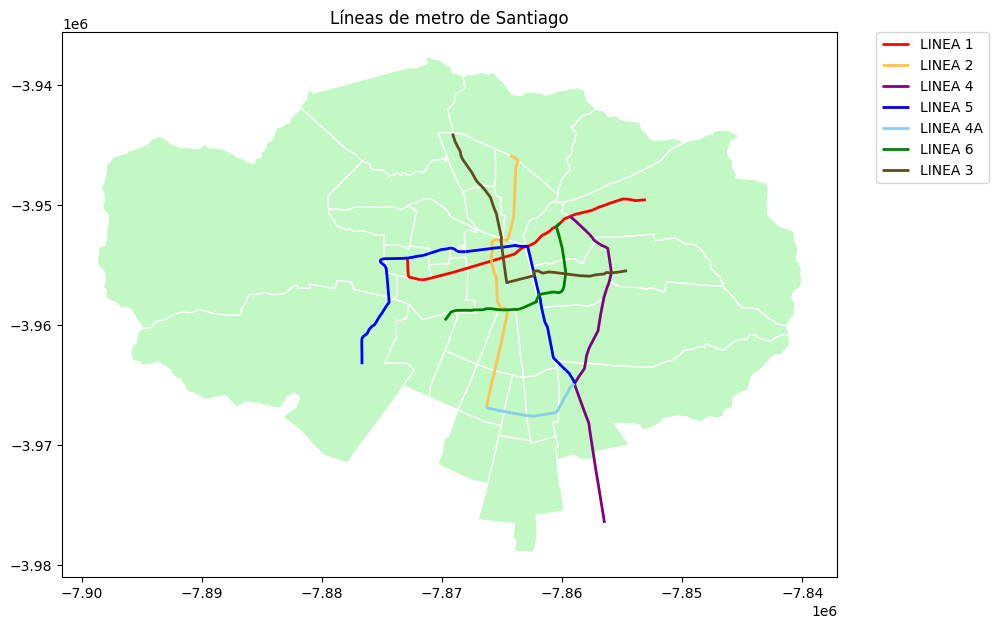

In [ ]:
fig, ax = plt.subplots(1, figsize=(10, 10))
i = 0
for linea in shp_lines:
    linea.plot(ax=ax, color=colores[i], linewidth=2, label=lineas[i])
    i += 1
santiago_nb.plot(ax=ax, color='#c1f8c3', edgecolor='white')
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.title('Líneas de metro de Santiago');
plt.savefig('../imgs/lineas_metro.png', bbox_inches = 'tight')

In [ ]:
import plotly.express as px

#plot lineas de metro
fig = px.line_mapbox()
fig.update_layout(mapbox_style="carto-positron", mapbox_zoom=10, mapbox_center_lat = -33.45, mapbox_center_lon = -70.65)

fig.show()

KeyError: None